<a href="https://colab.research.google.com/github/Adithya-Siddam/mnist-classification/blob/main/Ex_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape


(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [11]:
single_image= X_train[52000]


In [9]:
single_image.shape


(28, 28)

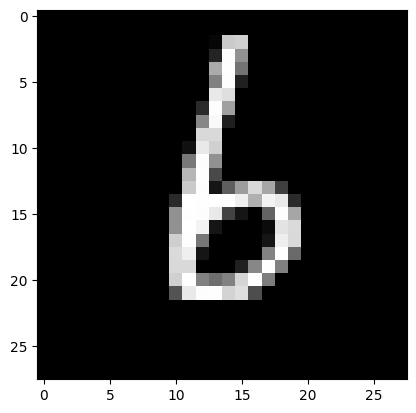

In [10]:
plt.imshow(single_image,cmap='gray')


In [12]:
y_train.shape


(60000,)

In [13]:
X_train.min()



0

In [14]:
X_train.max()


255

In [15]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [16]:
X_train_scaled.min()


0.0

In [17]:
X_train_scaled.max()


1.0

In [18]:
y_train[0]


5

In [19]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [20]:
type(y_train_onehot)


numpy.ndarray

In [21]:
y_train_onehot.shape


(60000, 10)

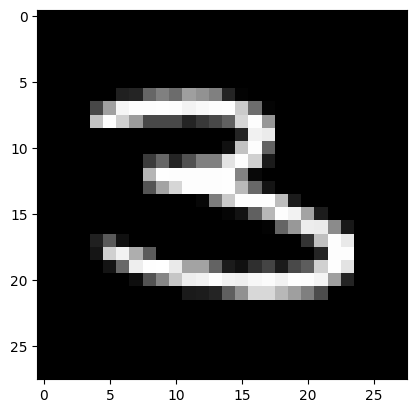

In [23]:
single_image = X_train[7800]
plt.imshow(single_image,cmap='gray')

In [24]:
y_train_onehot[7800]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [26]:
Ai_img = keras.Sequential()
Ai_img.add(layers.Input(shape=(28,28,1)))
Ai_img.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
Ai_img.add(layers.MaxPool2D(pool_size=(2,2)))
Ai_img.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
Ai_img.add(layers.MaxPool2D(pool_size=(2,2)))
Ai_img.add(layers.Flatten())
Ai_img.add(layers.Dense(128,activation="relu"))
Ai_img.add(layers.Dense(64))
Ai_img.add(layers.Dense(32))
Ai_img.add(layers.Dense(10,activation="softmax"))

In [28]:
Ai_img.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [29]:
Ai_img.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [32]:
Ai_img.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0447 - val_accuracy: 0.9851
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0356 - val_accuracy: 0.9876
Epoch 3/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 5/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0279 - val_accuracy: 0.9911


In [33]:
metrics = pd.DataFrame(Ai_img.history.history)

In [34]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.057903,0.982483,0.044699,0.9851
1,0.036429,0.988600,0.035560,0.9876
2,0.028876,0.990883,0.035132,0.9884
3,0.020671,0.993100,0.036812,0.9879
4,0.018745,0.994083,0.027898,0.9911


<Axes: >

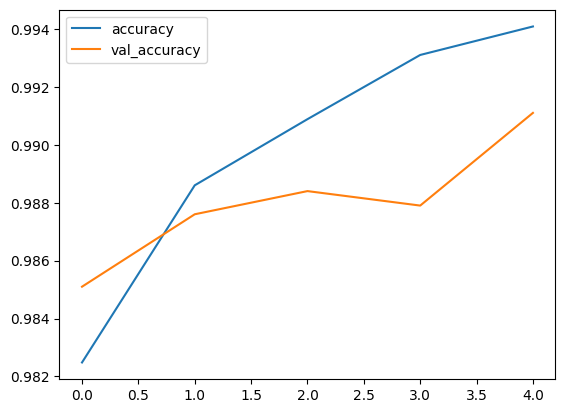

In [35]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

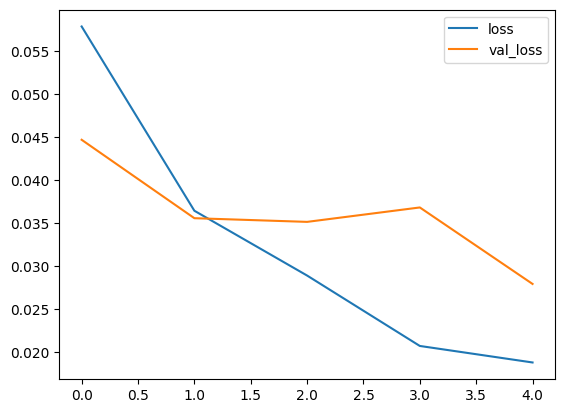

In [36]:
metrics[['loss','val_loss']].plot()


In [38]:
x_test_predictions = np.argmax(Ai_img.predict(X_test_scaled), axis=1)


313/313 [==============================] - 3s 9ms/step


In [39]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1130    0    0    2    0    1    0    1    1]
 [   2    0 1016    0    0    0    0   14    0    0]
 [   0    0    1 1002    0    4    0    2    1    0]
 [   0    0    0    0  966    0    1    0    2   13]
 [   0    0    0    3    0  885    2    0    1    1]
 [   7    2    1    0    0    0  943    0    5    0]
 [   0    2    2    0    0    0    0 1018    1    5]
 [   0    0    0    0    0    0    0    2  969    3]
 [   1    0    0    0    3    3    0    0    0 1002]]


In [40]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
img = image.load_img('4.jpeg')


In [42]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [43]:
img = image.load_img('4.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    Ai_img.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 52ms/step


In [46]:
print(x_single_prediction)


[1]


Adithya Chowdary
212221230100


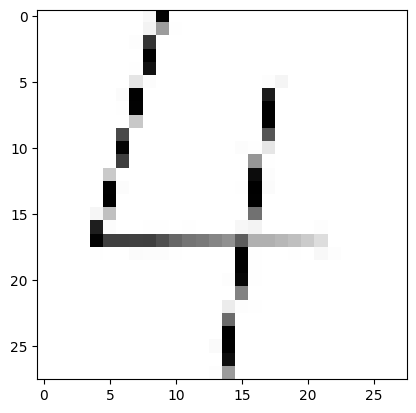

In [51]:
print("Adithya Chowdary")
print("212221230100")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [48]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [49]:
x_single_prediction = np.argmax(
    Ai_img.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 62ms/step


In [54]:
print("Adithya Chowdary")
print("212221230100")
print("Prediction output:",x_single_prediction)


Adithya Chowdary
212221230100
Prediction output: [4]
